<a href="https://colab.research.google.com/github/arunkashish/Arunkumar.S/blob/main/ARUN_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv("/content/train-chennai-sale.csv")
data=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
df=df.drop(columns=["PRT_ID"])

In [ ]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**AREA DataCleaning**

In [ ]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Chrompet","chromepet"))
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Chrompt","chromepet"))
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Chrmpet","chromepet"))
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Chormpet","chromepet"))

In [ ]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Adyr","Adyar"))
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Karapakam","Karapakkam"))
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Velchery","Velachery"))
df["AREA"]= df["AREA"].apply(lambda x: x.replace("KKNagar","KK Nagar"))
df["AREA"]= df["AREA"].apply(lambda x: x.replace("TNagar","T Nagar"))

In [ ]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Ana Nagar","Anna Nagar"))
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Ann Nagar","Anna Nagar"))

In [ ]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'chromepet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df["AREA"].value_counts()

chromepet     1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [ ]:
df["INT_SQFT"].isnull().sum()

0

**Calulating the Age of the Building**

In [ ]:
df["DATE_SALE"] = pd.to_datetime(df["DATE_SALE"])
df['DATE_BUILD']=pd.to_datetime(df["DATE_BUILD"])

In [ ]:
data['soldyear']=df['DATE_SALE'].dt.year
data['builtyear']=df['DATE_BUILD'].dt.year

In [ ]:
df['Life_of_House']=data['soldyear']-data['builtyear']

In [ ]:
df=df.drop(columns=["DATE_SALE","DATE_BUILD"])

In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
Life_of_House      int64
dtype: object

**DIST_MAINROAD**

In [ ]:
df["DIST_MAINROAD"].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

**N_BEDROOM** data processing

In [ ]:
df["N_BEDROOM"].describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [ ]:
df["N_BEDROOM"].isnull().sum()

1

In [ ]:
df["N_BEDROOM"].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [ ]:
df=df.dropna(subset=["N_BEDROOM"])

In [ ]:
df["N_BEDROOM"].isnull().sum()

0

In [ ]:
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int64")

In [ ]:
df["N_BEDROOM"].describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

**N_BATHROOM** data processing

In [ ]:
df["N_BATHROOM"].isnull().sum()

5

In [ ]:
df=df.dropna(subset=["N_BATHROOM"])

In [ ]:
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df["N_BATHROOM"].value_counts()

1    5588
2    1515
Name: N_BATHROOM, dtype: int64

In [ ]:
df["N_BATHROOM"].describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

**N_ROOM** data preprcessing

In [ ]:
df["N_ROOM"].isnull().sum()

0

In [ ]:
df["N_ROOM"].value_counts()

4    2561
3    2122
5    1245
2     921
6     254
Name: N_ROOM, dtype: int64

In [ ]:
df["N_ROOM"].describe()

count    7103.000000
mean        3.688723
std         1.019299
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

**SALE_COND** data processing

In [ ]:
df["SALE_COND"].describe()

count        7103
unique          9
top       AdjLand
freq         1433
Name: SALE_COND, dtype: object

In [ ]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df["SALE_COND"] =df["SALE_COND"].apply(lambda x:x.replace("Partiall","Partial"))
df["SALE_COND"] =df["SALE_COND"].apply(lambda x:x.replace("PartiaLl","Partial"))
df["SALE_COND"] =df["SALE_COND"].apply(lambda x:x.replace("Ab Normal","AbNormal"))
df["SALE_COND"] =df["SALE_COND"].apply(lambda x:x.replace("Adj Land","AdjLand"))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
df["SALE_COND"].value_counts()

AdjLand        1439
Partial        1430
Normal Sale    1422
AbNormal       1410
Family         1402
Name: SALE_COND, dtype: int64

**PARK_FACIL** data processing

In [ ]:
df["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
repla={'Noo':'No'}
df["PARK_FACIL"]=df["PARK_FACIL"].replace(repla)

In [ ]:
df["PARK_FACIL"].value_counts()

Yes    3584
No     3519
Name: PARK_FACIL, dtype: int64

**BUILDTYPE**

In [ ]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
rep={'Others':'Other','Comercial':'Commercial'}
df["BUILDTYPE"]=df["BUILDTYPE"].replace(rep)

In [ ]:
df["BUILDTYPE"].value_counts()

House         2443
Other         2331
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
Life_of_House      int64
dtype: object

**UTILITY_AVAIL** data processing

In [ ]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df["UTILITY_AVAIL"].isnull().sum()

0

In [ ]:
df["UTILITY_AVAIL"].value_counts()

AllPub     1885
NoSeWa     1870
NoSewr     1826
ELO        1521
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
re={'All Pub':'AllPub','NoSeWa':'NoSewa','NoSewr ':'NoSewr'}
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(re)

In [ ]:
df["UTILITY_AVAIL"].value_counts()

AllPub    1886
NoSewa    1870
NoSewr    1826
ELO       1521
Name: UTILITY_AVAIL, dtype: int64

**STREET**

In [ ]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
re1={'Pavd':'Paved','No Access':'NoAccess'}
df["STREET"]=df["STREET"].replace(re1)

In [ ]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [ ]:
df["STREET"].isnull().sum()

0

In [ ]:
df["STREET"].value_counts()

Paved       2570
Gravel      2518
NoAccess    2015
Name: STREET, dtype: int64

**MZZONE**

In [ ]:
df["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df["MZZONE"].value_counts()

RL    1856
RH    1822
RM    1813
C      550
A      537
I      525
Name: MZZONE, dtype: int64

**QS_ROOMS**

In [ ]:
df["QS_ROOMS"].isnull().sum()

0

In [ ]:
df["QS_BATHROOM"].isnull().sum()

0

In [ ]:
df["QS_BEDROOM"].isnull().sum()

0

In [ ]:
df["QS_OVERALL"].isnull().sum()

47

In [ ]:
bool=pd.isnull(df["QS_OVERALL"])
df[bool]

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Life_of_House
15,Velachery,1868,148,3,2,5,Family,No,Commercial,NoSewr,Gravel,RH,3.8,3.8,3.1,NaN,597135,188569,15714080,9
46,T Nagar,1882,189,2,1,5,AbNormal,Yes,Other,ELO,Gravel,RM,3.9,4.5,4.7,NaN,433393,272877,16051580,21
86,chromepet,1085,149,1,1,3,AbNormal,Yes,Commercial,NoSewr,Gravel,RL,2.8,3.8,4.6,NaN,387815,100545,14363500,6
111,Adyar,1034,73,1,1,3,AdjLand,Yes,Other,ELO,Gravel,C,3.8,3.3,3.5,NaN,277702,46284,9256740,16
134,T Nagar,1942,10,2,1,5,Family,No,House,NoSewa,Gravel,RH,4.6,3.1,2.9,NaN,320599,61654,12330740,37
143,Karapakkam,1430,17,2,2,4,AbNormal,Yes,Other,NoSewr,NoAccess,A,4.3,3.2,3.8,NaN,238887,106172,6635750,10
161,Velachery,1824,187,3,2,5,Normal Sale,No,House,NoSewr,Paved,I,3.9,2.3,4.1,NaN,273570,76942,8549060,33
186,Adyar,738,69,1,1,2,Partial,No,Commercial,NoSewr,NoAccess,I,2.4,4.7,5.0,NaN,324194,8313,8312670,18
208,Karapakkam,1578,153,2,2,4,Normal Sale,Yes,Other,AllPub,Gravel,I,4.3,4.6,3.4,NaN,295508,238313,9532500,13
248,Velachery,1776,120,2,1,4,Normal Sale,Yes,House,NoSewa,Paved,RH,4.9,2.4,3.4,NaN,319653,89903,9989170,21


In [ ]:
df["QS_OVERALL"]=df["QS_OVERALL"].fillna(df["QS_OVERALL"].median())

In [ ]:
#fill=df["QS_OVERALL"].fillna(df["QS_OVERALL"].median())
#fill[bool]

In [ ]:
df["QS_OVERALL"].isnull().sum()

0

In [ ]:
df["QS_OVERALL"].describe()

count    7103.000000
mean        3.503366
std         0.525565
min         2.000000
25%         3.130000
50%         3.500000
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

**REG_FEE**

In [ ]:
df["REG_FEE"].isnull().sum()

0

In [ ]:
df["COMMIS"].isnull().sum()

0

In [ ]:
df["SALES_PRICE"].isnull().sum()

0

In [ ]:
df["SALES_PRICE"].describe()

count    7.103000e+03
mean     1.089477e+07
std      3.769549e+06
min      2.156875e+06
25%      8.270900e+06
50%      1.033464e+07
75%      1.299422e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

**EDA- EXPLORATORY DATA ANALYSIS**

In [ ]:
#sns.pairplot(df)

In [ ]:
#pip install sweetviz

In [ ]:
#import sweetviz as sv
#report=sv.analyze(df)
#report.show_html("./report.html")

In [ ]:
#import IPython
#IPython.display.HTML("/content/report.html")

In [ ]:
#import sweetviz as sv
#compare=sv.analyze(df,target_feat="SALES_PRICE")
#compare.show_html("./COMPARE.html")

**CORRELATION HEAT MAP**

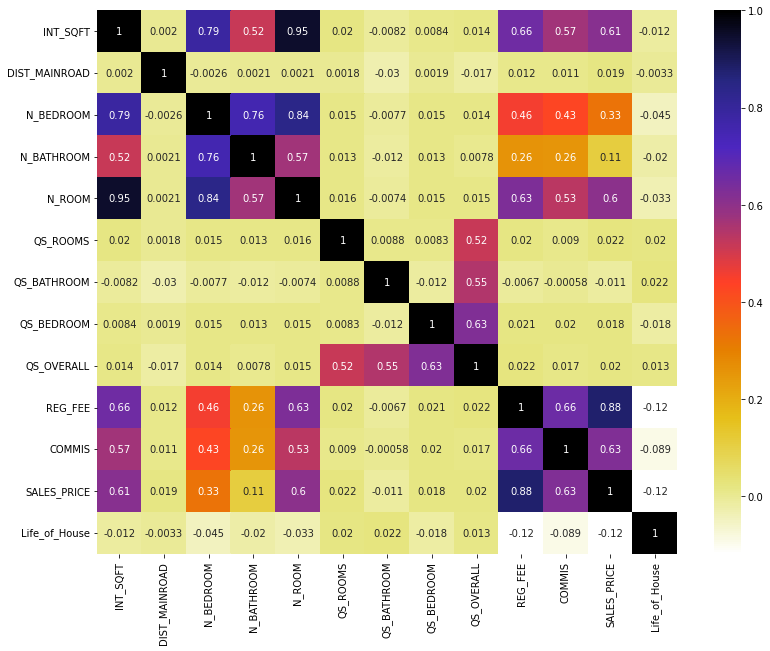

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

**SALES IS COMPARED WITH EACH AND EVERY OTHER COLOUM, TO CHECK RELATION**

In [ ]:
#import IPython
#IPython.display.HTML("/content/COMPARE.html")

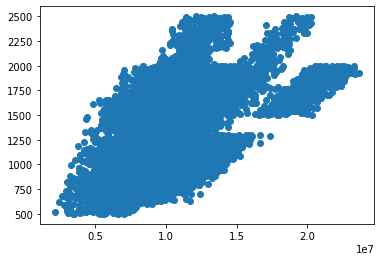

In [ ]:
plt.scatter(df["SALES_PRICE"],df["INT_SQFT"]) 
#sns.regplot(x="SALES_PRICE",y="REG_FEE",data=data) 

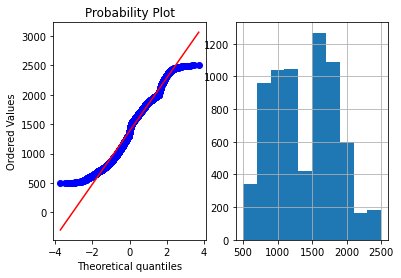

In [ ]:
import scipy.stats as stats
plt.subplot(1, 2, 1)
stats.probplot(df["INT_SQFT"], dist="norm", plot=plt)
plt.subplot(1, 2, 2)
df["INT_SQFT"].hist()

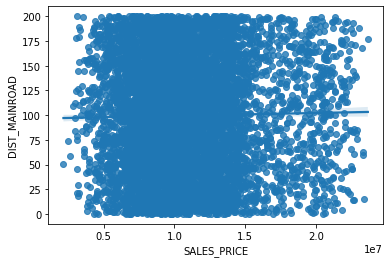

In [ ]:
import seaborn as sns
sns.regplot(x="SALES_PRICE",y="DIST_MAINROAD",data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


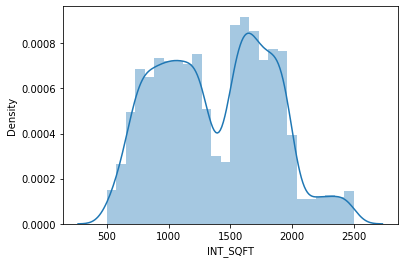

In [ ]:
sns.distplot(df['INT_SQFT'])

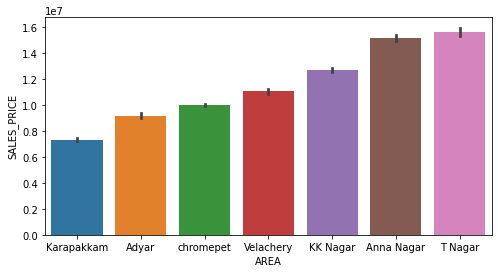

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=df["AREA"],y=df["SALES_PRICE"],order= df.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])

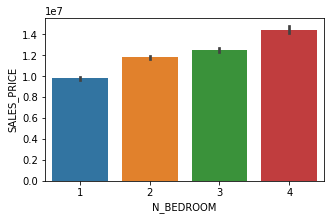

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=df["N_BEDROOM"] , y= df["SALES_PRICE"],order= df.groupby("N_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BEDROOM"])

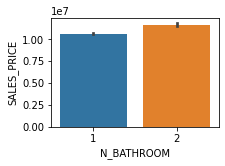

In [ ]:
plt.figure(figsize=(3,2))
sns.barplot(x= df["N_BATHROOM"], y= df["SALES_PRICE"])

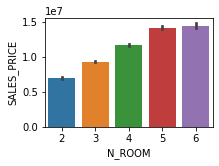

In [ ]:
plt.figure(figsize=(3,2))
sns.barplot(x=df["N_ROOM"], y= df["SALES_PRICE"])

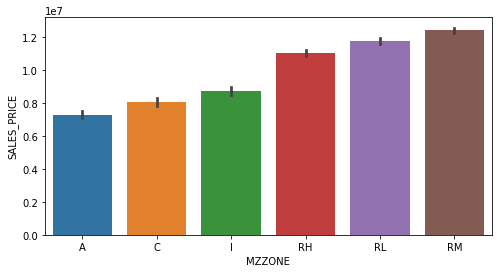

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x="MZZONE",y="SALES_PRICE",data=df,order= df.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])

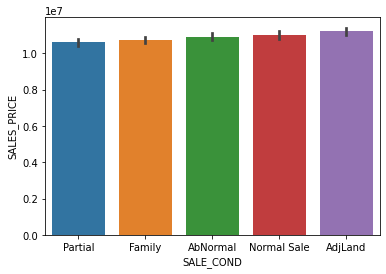

In [ ]:
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=df,order= df.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])


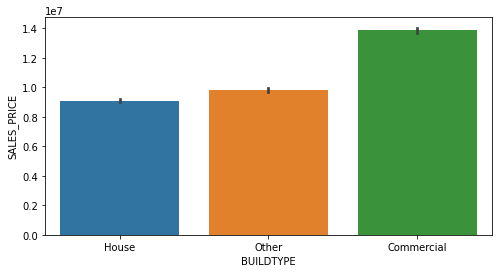

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x= df["BUILDTYPE"], y= df["SALES_PRICE"],order= df.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])

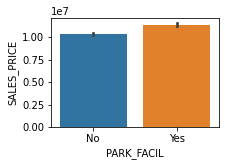

In [ ]:
plt.figure(figsize=(3,2))
sns.barplot(x= df["PARK_FACIL"], y=df["SALES_PRICE"],order= df.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])


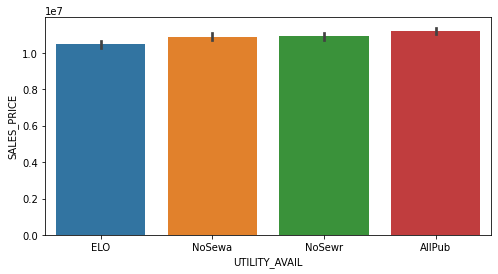

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x= df["UTILITY_AVAIL"], y= df["SALES_PRICE"],order= df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])

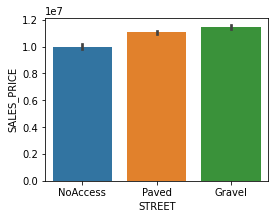

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(x= df["STREET"], y= df["SALES_PRICE"],order= df.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])

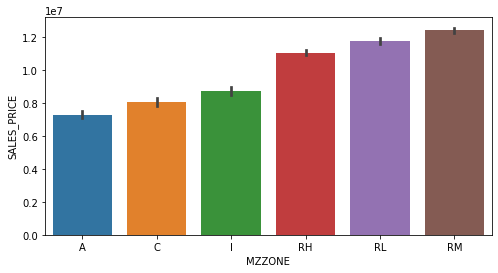

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x= df["MZZONE"], y= df["SALES_PRICE"],order= df.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])

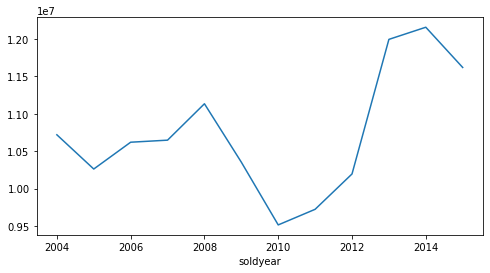

In [ ]:
plt.figure(figsize=(8,4))
data.groupby ('soldyear')['SALES_PRICE'].median().plot()


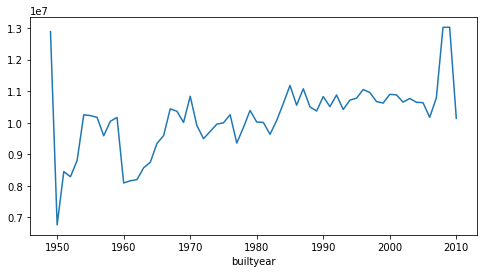

In [ ]:
plt.figure(figsize=(8,4))
df['yearbuild']=data['builtyear']
data.groupby ('builtyear')['SALES_PRICE'].median().plot()

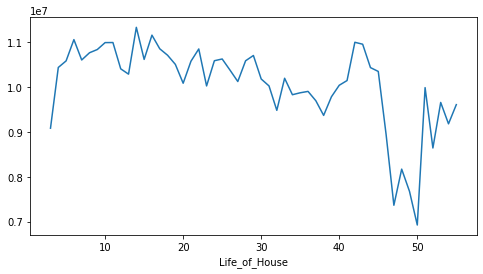

In [ ]:
plt.figure(figsize=(8,4))
df.groupby('Life_of_House')['SALES_PRICE'].median().plot()


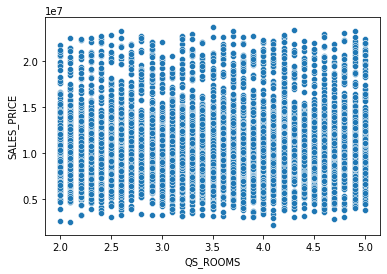

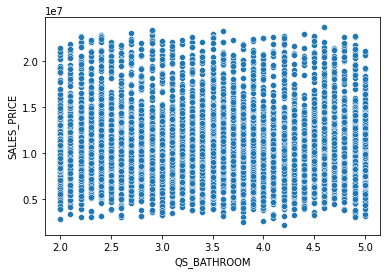

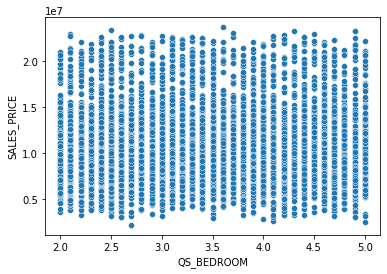

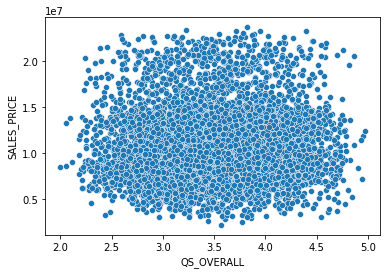

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x= df["QS_ROOMS"],y= df["SALES_PRICE"])
plt.figure(figsize=(6,4))
sns.scatterplot(x= df["QS_BATHROOM"],y= df["SALES_PRICE"]) 
plt.figure(figsize=(6,4))
sns.scatterplot(x= df["QS_BEDROOM"],y= df["SALES_PRICE"])
plt.figure(figsize=(6,4))
sns.scatterplot(x= df["QS_OVERALL"],y= df["SALES_PRICE"]) 

**Checking Skewness for REG_Fee, COMIS**

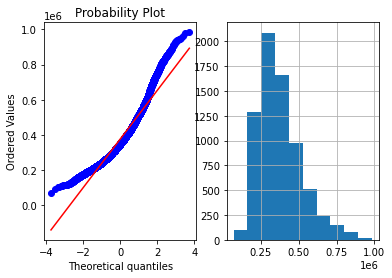

In [ ]:
plt.subplot(1, 2, 1)
stats.probplot(df["REG_FEE"], dist="norm", plot=plt)
plt.subplot(1, 2, 2)
df["REG_FEE"].hist()

In [ ]:
df['Log_REG_FEE']=np.log(df['REG_FEE']+1)

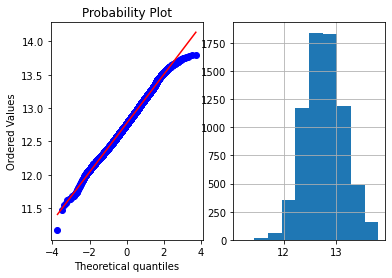

In [ ]:
plt.subplot(1, 2, 1)
stats.probplot(df['Log_REG_FEE'], dist="norm", plot=plt)

plt.subplot(1, 2, 2)
df['Log_REG_FEE'].hist()

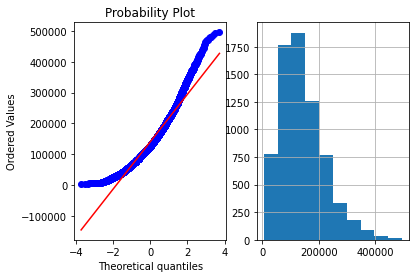

In [ ]:
plt.subplot(1, 2, 1)
stats.probplot(df["COMMIS"], dist="norm", plot=plt)
plt.subplot(1, 2, 2)
df["COMMIS"].hist()

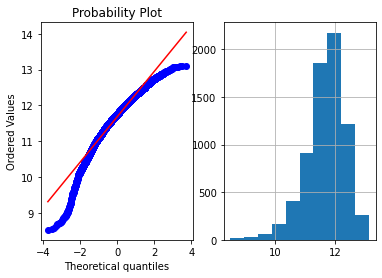

In [ ]:
df['Log_COMMIS']=np.log(df['COMMIS']+1)

plt.subplot(1, 2, 1)
stats.probplot(df['Log_COMMIS'], dist="norm", plot=plt)
plt.subplot(1, 2, 2)
df['Log_COMMIS'].hist()

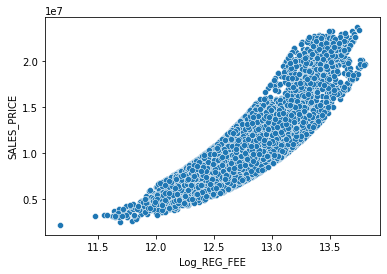

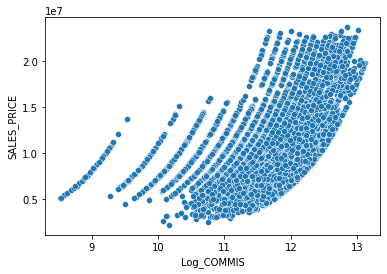

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x= df["Log_REG_FEE"],y= df["SALES_PRICE"])
plt.figure(figsize=(6,4))
sns.scatterplot(x= df["Log_COMMIS"],y= df["SALES_PRICE"]) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


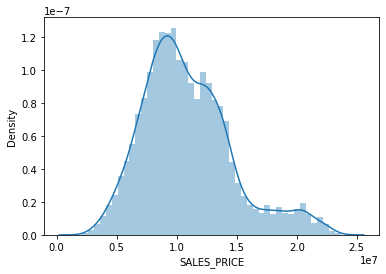

In [ ]:
sns.distplot(df['SALES_PRICE'])

In [ ]:
df['SALES_PRICE'] = np.log(df['SALES_PRICE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


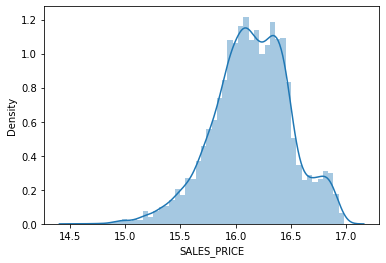

In [ ]:
sns.distplot(df['SALES_PRICE'])

In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE      float64
Life_of_House      int64
yearbuild          int64
Log_REG_FEE      float64
Log_COMMIS       float64
dtype: object

'N_ROOM'- highly correlated with INTSQT (0.9) so dropped

"DIST_MAINROAD, QS_ROOMS, QS_BEDROOM, QS_OVERALL,QS_BATHROOM" - no linearity according to Sale Price , so dropped

'REG_FEE','COMMIS'-no relationship in house price


**FEATURE SELECTION**

In [ ]:
df= df.drop(columns=["N_ROOM","REG_FEE", "COMMIS", "Log_REG_FEE", "Log_COMMIS", 'QS_BEDROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_OVERALL', 'DIST_MAINROAD'], axis=1)

In [ ]:
df.corr()

,INT_SQFT,N_BEDROOM,N_BATHROOM,SALES_PRICE,Life_of_House,yearbuild
INT_SQFT,1.000000,0.786392,0.515433,0.627158,-0.012273,-0.009563
N_BEDROOM,0.786392,1.000000,0.755214,0.353392,-0.045370,0.012013
N_BATHROOM,0.515433,0.755214,1.000000,0.132728,-0.020198,0.001347
SALES_PRICE,0.627158,0.353392,0.132728,1.000000,-0.137563,0.131772
Life_of_House,-0.012273,-0.045370,-0.020198,-0.137563,1.000000,-0.984728
yearbuild,-0.009563,0.012013,0.001347,0.131772,-0.984728,1.000000


In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Life_of_House,yearbuild
0,Karapakkam,1004,1,1,AbNormal,Yes,Commercial,AllPub,Paved,A,15.843659,44,1967
1,Anna Nagar,1986,2,1,AbNormal,No,Commercial,AllPub,Gravel,RH,16.893641,11,1995
2,Adyar,909,1,1,AbNormal,Yes,Commercial,ELO,Gravel,RL,16.392632,20,1992
3,Velachery,1855,3,2,Family,No,Other,NoSewr,Paved,I,16.080424,22,1988
4,Karapakkam,1226,1,1,AbNormal,Yes,Other,AllPub,Gravel,C,15.817835,30,1979


**LABEL Encoding the data**

In [ ]:
df["AREA"]= df["AREA"].map({'Karapakkam':1,'Adyar': 2,'chromepet' :3,'Velachery' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})
df["SALE_COND"]= df["SALE_COND"].map({'Partial':1,'Family':2, 'AbNormal':3,'Normal Sale':4,'AdjLand':5})
df["PARK_FACIL"]= df["PARK_FACIL"].map({'No': 0, 'Yes':1})
df["UTILITY_AVAIL"]= df["UTILITY_AVAIL"].map({'ELO':1,'NoSewa':3,'NoSewr':2,'AllPub':4})
df["STREET"]= df["STREET"]. map({'NoAccess':1,'Paved':3,'Gravel':2})
df["BUILDTYPE"]=df["BUILDTYPE"].map({'Commercial':3,'House':1,'Other':2})
df["MZZONE"]= df["MZZONE"].map({'A':1,'C':2, 'I':3,'RH':5,'RL':6,'RM':7})

**Train test split to avoid over fitting**

In [ ]:
x = df.drop("SALES_PRICE",axis=1)   #Feature Matrix
y = df["SALES_PRICE"] 

In [ ]:
x.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Life_of_House,yearbuild
0,1,1004,1,1,3,1,3,4,3,1,44,1967
1,6,1986,2,1,3,0,3,4,2,5,11,1995
2,2,909,1,1,3,1,3,1,2,6,20,1992
3,4,1855,3,2,2,0,2,2,3,3,22,1988
4,1,1226,1,1,3,1,2,4,2,2,30,1979


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [ ]:
df.dtypes

AREA               int64
INT_SQFT           int64
N_BEDROOM          int64
N_BATHROOM         int64
SALE_COND          int64
PARK_FACIL         int64
BUILDTYPE          int64
UTILITY_AVAIL      int64
STREET             int64
MZZONE             int64
SALES_PRICE      float64
Life_of_House      int64
yearbuild          int64
dtype: object

**STANDARSCALER FOR SCALING DOWN THE VALUES**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5682, 12), (1421, 12), (5682,), (1421,))

In [ ]:
from sklearn.linear_model import LinearRegression
linr= LinearRegression()
linr.fit(X_train,y_train)
linr.score(X_test,y_test)

0.8785180688946979

In [ ]:
y_pred= linr.predict(X_test)
y_pred

array([15.78795153, 15.90160982, 16.00475727, ..., 16.3412271 ,
       16.14026695, 15.87939353])

**R2_SCORE**

In [ ]:
from sklearn.metrics import r2_score
accuracy= r2_score(y_test,y_pred)
accuracy

0.8785180688946979

In [ ]:
compare=pd.DataFrame({"Predicted":y_pred,"Actual":y_test})
compare

,Predicted,Actual
2921,15.787952,15.703527
3994,15.901610,16.166852
5156,16.004757,15.879489
510,15.651899,15.750324
3553,15.874449,16.010961
...,...,...
5065,16.722027,16.718906
3700,16.339853,16.453590
66,16.341227,16.408130
3214,16.140267,16.118782


In [ ]:
coefficen= pd.DataFrame(linr.coef_, x.columns, columns=["Coefficient"])
coefficen

,Coefficient
AREA,0.107600
INT_SQFT,0.166790
N_BEDROOM,-0.068014
N_BATHROOM,0.023206
SALE_COND,0.019523
PARK_FACIL,0.052147
BUILDTYPE,0.165059
UTILITY_AVAIL,0.002465
STREET,0.013968
MZZONE,0.109373


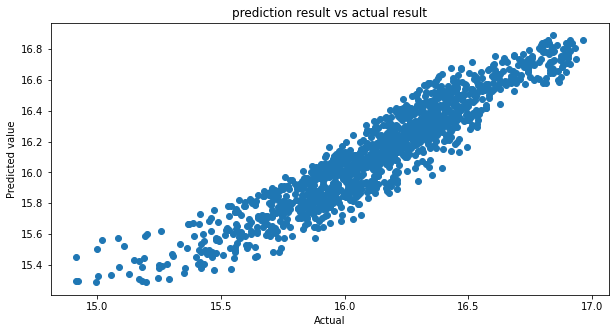

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("prediction result vs actual result")
plt.show()

**Dession tree**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 
li=[]
li1=[]
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,90]:
  dt= DecisionTreeRegressor(max_depth= depth)
  dt.fit(X_train,y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  val= cross_val_score(dt, x, y, cv=10)
  sc=np.mean(val)
  li.append(sc)
b=max(li)
print(li.index(b),b)


12 0.9620527737671793


In [ ]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt= DecisionTreeRegressor(max_depth=11)
dt.fit(X_train,y_train)
pred= dt.predict(X_test)
acc=r2_score(y_test,pred)
acc

0.9633591403421534

In [ ]:

df2= pd.DataFrame({"Actual": y_test, "Predicted": pred})
df2.head()


,Actual,Predicted
2921,15.703527,15.851792
3994,16.166852,16.173988
5156,15.879489,15.819880
510,15.750324,15.718476
3553,16.010961,16.006255


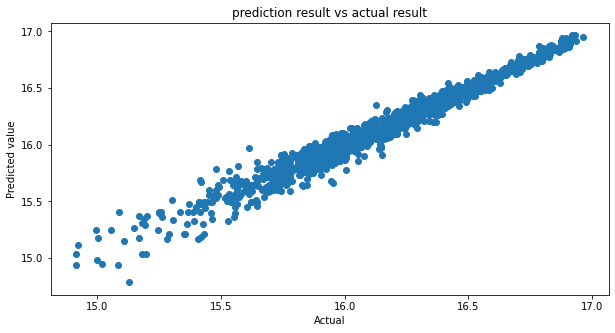

In [ ]:
y_pred_dt=dt.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_dt)
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("prediction result vs actual result")
plt.show()

In [ ]:
"""
xnew=[[1,1004,1,1,3,3,1,1,1,3,1,16060]]
xnew=scaler.fit_transform(xnew)
ynew=linr.predict(xnew)
ynew1=dt.predict(xnew)
print("linear:", ynew)
print("Dessision Tree:", ynew1)
"""

'\nxnew=[[1,1004,1,1,3,3,1,1,1,3,1,16060]]\nxnew=scaler.fit_transform(xnew)\nynew=linr.predict(xnew)\nynew1=dt.predict(xnew)\nprint("linear:", ynew)\nprint("Dessision Tree:", ynew1)\n'

**KNN model**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
l=[]
for i in [1,2,3,4,5,6,7,8,9,10,80]:
  knn= KNeighborsRegressor(i)           
  knn.fit(x_train,y_train)
  score1=np.mean(cross_val_score(knn,X_train,y_train, cv=10))
  l.append(score1)
a=max(l)
print(l.index(a),a)

4 0.887021912731196


KNN high K Value =0.887021912731196  (4)

In [ ]:
knn= KNeighborsRegressor(4)
knn.fit(X_train, y_train)
pred1= knn.predict(X_test)
acc1=r2_score(y_test,y_pred)
acc1

0.8785180688946979

**XGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.07,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.8,0.9,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_train,y_train) 
  model.score(X_test,y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_test,y_test), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -255.97667057570294  Cross-Val score :  -271.42566987906565
Learning rate :  0.02  Train score :  -32.89461714096008  Cross-Val score :  -34.990921589491904
Learning rate :  0.03  Train score :  -3.4408964064834704  Cross-Val score :  -3.726939690724575
Learning rate :  0.04  Train score :  0.38613150438209365  Cross-Val score :  0.34703609792111917
Learning rate :  0.05  Train score :  0.8863082427175758  Cross-Val score :  0.8790879598624184
Learning rate :  0.07  Train score :  0.9718108960841103  Cross-Val score :  0.9696902373631946
Learning rate :  0.1  Train score :  0.9853190069441085  Cross-Val score :  0.9848918980332533
Learning rate :  0.11  Train score :  0.9871422990570825  Cross-Val score :  0.9869039257885535
Learning rate :  0.12  Train score :  0.9894591111618923  Cross-Val score :  0.9883657594431717
Learning rate :  0.13  Train score :  0.9898730283388675  Cross-Val score :  0.9898286361144898
Learning rate :  0.14  Train score 

In [ ]:
model1 = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100) # initialise the model
model1.fit(X_train,y_train) #train the model
model1.score(X_test,y_test) # scoring the model - r2 squared
print("Sore :",model1.score(X_train,y_train))
print("Crossval :",np.mean(cross_val_score(model1, X_train, y_train, cv=10)))


[14:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Sore : 0.9966584189905561
[14:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now

Highest accuracy in XGboost

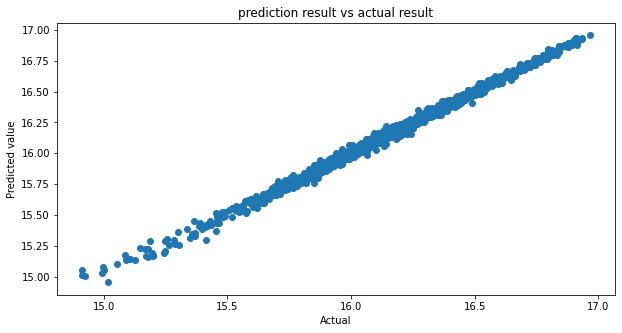

In [ ]:
y_pred_xg=model1.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_xg)
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("prediction result vs actual result")
plt.show()